In [2]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import extract_patches_2d
from digipath.plotter import plotter
from tqdm import tqdm

In [74]:
ORIGINAL_DATA_DIR = 'data/drive_training'
PROCESSED_DATA_DIR = 'data/processed'
N_TILES_PER_IMAGE = 400
TILE_SIZE = 64

# <ins> PROCESS ORIGINAL DATA

In [4]:
dirs = os.listdir(ORIGINAL_DATA_DIR)
dirs

['fov', 'images', 'gts']

In [5]:
# # Rename files and save as PNGs.
# for dir in dirs:
#     dirpath = os.path.join(ORIGINAL_DATA_DIR, dir)
#     filepaths = sorted([os.path.join(dirpath, x) for x in os.listdir(dirpath)])
    
#     for i in range(len(filepaths)):
#         file = Image.open(filepaths[i])
#         output_dirpath = os.path.join(PROCESSED_DATA_DIR, dir)
        
#         if not os.path.exists(output_dirpath):
#             os.makedirs(output_dirpath)
        
#         # Build filename
#         n_zeros = 3 - len(str(i))
#         filename = n_zeros * '0' + str(i) + '.png'
        
#         file.save(os.path.join(output_dirpath, filename))

In [6]:
# Average image size.
dirpath = os.path.join(PROCESSED_DATA_DIR, 'images')
filepaths = sorted([os.path.join(dirpath, x) for x in os.listdir(dirpath)])

sizes = []
for i in range(len(filepaths)):
    image = Image.open(filepaths[i])
    sizes.append(image._size)

np.mean([x[0] for x in sizes]), np.mean([x[1] for x in sizes])

(565.0, 584.0)

# <ins> EXTRACT TILES

In [75]:
# Number of original images
len(os.listdir(os.path.join(PROCESSED_DATA_DIR, 'images')))

20

## FOR ONE IMAGE

In [8]:
image = Image.open('/home/gpievanitrapletti/retina/data/processed/images/000.png')
gt = Image.open('/home/gpievanitrapletti/retina/data/processed/gts/000.png')

In [9]:
image_ar = np.array(image)
gt_ar = np.array(gt)
print(image_ar.shape)

(584, 565, 3)


In [10]:
# plotter(image_ar, 3)

In [11]:
# plotter(gt, 3)

In [12]:
image_patches = extract_patches_2d(image_ar, (TILE_SIZE, TILE_SIZE), max_patches=N_TILES_PER_IMAGE, random_state=42)
gt_patches = extract_patches_2d(gt_ar, (TILE_SIZE, TILE_SIZE), max_patches=N_TILES_PER_IMAGE, random_state=42)

print(image_patches.shape, gt_patches.shape)

(300, 64, 64, 3) (300, 64, 64)


In [13]:
# # Some of the extracted tiles
# fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))

# z = 0
# for i in range(5):
#     for j in range(5):
#         # Plot the data on the current subplot
#         axes[i,j].imshow(image_patches[z])
#         axes[i,j].axis('off')
#         z += 1

# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.1) # spacing
# plt.show()

In [14]:
# # Their gt gts
# fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))

# z = 0
# for i in range(5):
#     for j in range(5):
#         # Plot the data on the current subplot
#         axes[i,j].imshow(gt_patches[z], cmap='gray')
#         axes[i,j].axis('off')
#         z += 1

# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.1) # spacing
# plt.show()

## EXTRACT ALL TILES AND MASKS

In [76]:
images_input_path = os.path.join(PROCESSED_DATA_DIR, 'images')
gts_input_path = os.path.join(PROCESSED_DATA_DIR, 'gts')
OUTPUT_PATH = 'data/tiles'

In [77]:
# image_paths = sorted([os.path.join(images_input_path, x) for x in os.listdir(images_input_path)])
# gt_paths = sorted([os.path.join(gts_input_path, x) for x in os.listdir(gts_input_path)])

# len(image_paths), len(gt_paths)

In [78]:
# Data paths, as list of data dicts
data_paths = []
image_paths = sorted([os.path.join(images_input_path, x) for x in os.listdir(images_input_path)])
gt_paths = sorted([os.path.join(gts_input_path, x) for x in os.listdir(gts_input_path)])
for i in range(len(image_paths)):
    d = {
        'image': image_paths[i],
        'mask': gt_paths[i]
    }
    data_paths.append(d)

random.seed(42)
random.shuffle(data_paths)

len(data_paths)

20

In [79]:
data_paths[0]

{'image': 'data/processed/images/019.png',
 'mask': 'data/processed/gts/019.png'}

In [80]:
# train_image_paths, train_gt_paths = image_paths[:18], gt_paths[:18]
# test_image_paths, test_gt_paths = image_paths[18:], gt_paths[18:]

# print(len(train_image_paths), len(train_gt_paths))
# print(len(test_image_paths), len(test_gt_paths))

In [81]:
n_train = int(len(data_paths)*0.7)
n_val = int(len(data_paths)*0.2)
n_test = int(len(data_paths)*0.1)

n_train, n_val, n_test

(14, 4, 2)

In [82]:
train_data_paths = data_paths[:n_train]
val_data_paths = data_paths[n_train:n_train+n_val]
test_data_paths = data_paths[n_train+n_val:]\

len(train_data_paths), len(val_data_paths), len(test_data_paths)

(14, 4, 2)

In [83]:
# def get_arrays(image_paths, gt_paths, tile_size, number, seed=42):
#     n = len(image_paths)
#     tiles_ls = []
#     gts_ls = []
#     for i in range(n):
#         image = np.asarray(Image.open(image_paths[i]))
#         gt = np.asarray(Image.open(gt_paths[i]))
#         image_patches = extract_patches_2d(image, (tile_size, tile_size), max_patches=number, random_state=seed)
#         tiles_ls.append(image_patches)
#         gt_patches = extract_patches_2d(gt, (tile_size, tile_size), max_patches=number, random_state=seed)
#         gts_ls.append(gt_patches)
    
#     tiles = np.concatenate(tiles_ls)
#     gts = np.concatenate(gts_ls)

#     # Shuffle
#     np.random.seed(seed)
#     idxs = np.random.choice(np.arange(0, len(tiles)), len(tiles), replace=False)
#     tiles = tiles[idxs]
#     gts = gts[idxs]

#     return tiles, gts

In [84]:
def get_arrays(data_paths, tile_size, number, seed=42):
    n = len(data_paths)
    tiles_ls = []
    gts_ls = []
    for data_dict in data_paths:
        image = np.asarray(Image.open(data_dict['image']))
        gt = np.asarray(Image.open(data_dict['mask']))
        image_patches = extract_patches_2d(image, (tile_size, tile_size), max_patches=number, random_state=seed)
        tiles_ls.append(image_patches)
        gt_patches = extract_patches_2d(gt, (tile_size, tile_size), max_patches=number, random_state=seed)
        gts_ls.append(gt_patches)
    
    tiles = np.concatenate(tiles_ls)
    gts = np.concatenate(gts_ls)

    # Shuffle
    np.random.seed(seed)
    idxs = np.random.choice(np.arange(0, len(tiles)), len(tiles), replace=False)
    tiles = tiles[idxs]
    gts = gts[idxs]

    return tiles, gts

In [85]:
train_tiles, train_gts = get_arrays(train_data_paths, TILE_SIZE, N_TILES_PER_IMAGE)

train_tiles.shape, train_gts.shape

((5600, 64, 64, 3), (5600, 64, 64))

In [86]:
val_tiles, val_gts = get_arrays(val_data_paths, TILE_SIZE, N_TILES_PER_IMAGE)

val_tiles.shape, val_gts.shape

((1600, 64, 64, 3), (1600, 64, 64))

In [87]:
test_tiles, test_gts = get_arrays(test_data_paths, TILE_SIZE, N_TILES_PER_IMAGE)

test_tiles.shape, test_gts.shape

((800, 64, 64, 3), (800, 64, 64))

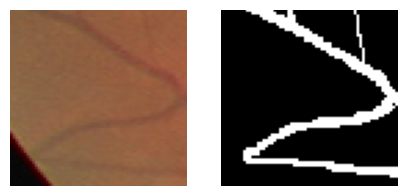

In [88]:
# Train example
i = 8
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

axes[0].imshow(train_tiles[i])
axes[0].axis('off')

axes[1].imshow(train_gts[i], cmap='gray')
axes[1].axis('off')

plt.show()

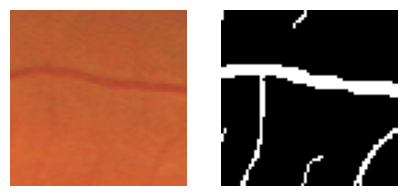

In [89]:
# Val example
i = 101
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

axes[0].imshow(train_tiles[i])
axes[0].axis('off')

axes[1].imshow(train_gts[i], cmap='gray')
axes[1].axis('off')

plt.show()

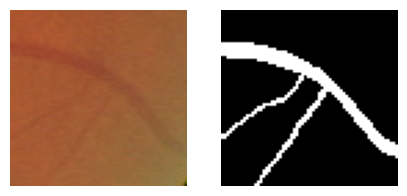

In [90]:
# Test example
i = 543
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

axes[0].imshow(train_tiles[i])
axes[0].axis('off')

axes[1].imshow(train_gts[i], cmap='gray')
axes[1].axis('off')

plt.show()

In [91]:
# # Check if train set and test set have no overlap
# count = 0
# for train_tile in tqdm(train_tiles):
#     for test_tile in test_tiles:
#         if np.all(train_tile==test_tile):
#             count += 1

# count

In [92]:
# How many empty gt masks
empty_train_idxs = [idx for idx in range(len(train_gts)) if train_gts[idx].sum()==0]
empty_val_idxs = [idx for idx in range(len(val_gts)) if val_gts[idx].sum()==0]
empty_test_idxs = [idx for idx in range(len(test_gts)) if test_gts[idx].sum()==0]

len(empty_train_idxs), len(empty_val_idxs), len(empty_test_idxs)

(427, 111, 58)

In [93]:
# Remove empty gt masks (and corresponding tile)
full_train_tiles = train_tiles[[idx for idx in range(len(train_tiles)) if idx not in empty_train_idxs]]
full_train_gts = train_gts[[idx for idx in range(len(train_gts)) if idx not in empty_train_idxs]]

full_val_tiles = val_tiles[[idx for idx in range(len(val_tiles)) if idx not in empty_val_idxs]]
full_val_gts = val_gts[[idx for idx in range(len(val_gts)) if idx not in empty_val_idxs]]

full_test_tiles = test_tiles[[idx for idx in range(len(test_tiles)) if idx not in empty_test_idxs]]
full_test_gts = test_gts[[idx for idx in range(len(test_gts)) if idx not in empty_test_idxs]]

In [94]:
print(full_train_tiles.shape, full_train_gts.shape)
print(full_val_tiles.shape, full_val_gts.shape)
print(full_test_tiles.shape, full_test_gts.shape)

(5173, 64, 64, 3) (5173, 64, 64)
(1489, 64, 64, 3) (1489, 64, 64)
(742, 64, 64, 3) (742, 64, 64)


In [96]:
# # Sample 5000 tiles and gts.
# idxs = np.arange(0, len(tiles), 1)
# random_idxs = np.random.choice(idxs, 5000)
# tiles = tiles[random_idxs]
# gts = gts[random_idxs]

# tiles.shape, gts.shape

In [97]:
# Check if gt masks all empty
empty_train_idxs = [idx for idx in range(len(full_train_gts)) if full_train_gts[idx].sum()==0]
empty_test_idxs = [idx for idx in range(len(full_test_gts)) if full_test_gts[idx].sum()==0]
len(empty_train_idxs), len(empty_test_idxs)

(0, 0)

In [99]:
# # Save train and test sets
# np.save(file=os.path.join(OUTPUT_PATH, 'train_tiles.npy'), arr=full_train_tiles)
# np.save(file=os.path.join(OUTPUT_PATH, 'train_gts.npy'), arr=full_train_gts)

# np.save(file=os.path.join(OUTPUT_PATH, 'val_tiles.npy'), arr=full_val_tiles)
# np.save(file=os.path.join(OUTPUT_PATH, 'val_gts.npy'), arr=full_val_gts)

# np.save(file=os.path.join(OUTPUT_PATH, 'test_tiles.npy'), arr=full_test_tiles)
# np.save(file=os.path.join(OUTPUT_PATH, 'test_gts.npy'), arr=full_test_gts)

In [121]:
# # Save as NPZ files, containing both images and masks
# np.savez('data/tiles/train_data.npz', images=full_train_tiles, masks=full_train_gts)
# np.savez('data/tiles/val_data.npz', images=full_val_tiles, masks=full_val_gts)
# np.savez('data/tiles/test_data.npz', images=full_test_tiles, masks=full_test_gts)

In [3]:
d = np.load('data/tiles/train_data.npz')

In [4]:
type(d)

numpy.lib.npyio.NpzFile

In [123]:
d.files

['images', 'masks']

In [124]:
d['images'].shape, d['masks'].shape

((5173, 64, 64, 3), (5173, 64, 64))